# EVALUATION PHASE--1 

# NAME OF PROJECT: LOAN-STATUS PREDICTION

# Import necessary libraries

# Problem Statement: The dataset aims at predicting the loan_status of various persons. We need to predict if the person's status is yes or no depending on the features like education, creadit history, married, income, loan amount, dependents, gender etc. 

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Download the dataset from Github and uploading the file via Jupyter Notebook, downloading here using pd.read_csv function 

In [374]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EXPLANATORY DATA ANALYSIS

In [20]:
df.shape

(614, 13)

In [ ]:
This dataset contains 614 rows and 13 columns or variabes, out of which one is a target or label

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Info() function shows 13 variables in total. There are 3 datatypes, object(8 columns), integer(1 column), and float(4 columns) 
datatypes. Various columns show their respective non-null values.  Memory usage is 62.5KB. Range of dataset is 0 to 613. 

# Checking for value_counts()

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

There are no wide spaces in any of the columns. We can see different value_counts of each varible separately.¶

# Checking for null values

In [181]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

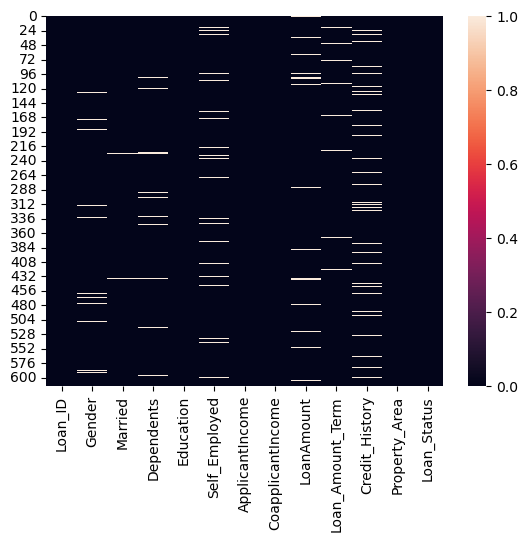

In [165]:
sns.heatmap(df.isnull())

Both isnull() method and the heatmap show many NaN values or missing values in the dataset. We can fill these missing values
with mode functin if the datatype is object and with mean if the datatype is float. 

# Filling the null values

In [375]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Education']=df['Education'].fillna(df['Education'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [376]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [347]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, now no null values are present in any of the columns. We can proceed further from here

In [348]:
df['Loan_Status'].nunique()

2

# The target variable Laon_Status has only 2 unique values. There are 614 rows. Therefore, we can see bias in the dataset. We can consider this is a classification problem and predict the status using various classification algorithms and also LogisticRegression can be used.  

In [250]:
df.nunique().to_frame("Loan Status Null Values")

,Loan Status Null Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


We can see different unique values of different columsn. The Loain_ID has 614 unique values which means the lenght of 
dataset is 614 rows itself. So each ID is unique. Gender, Married, Education, SElf-Employed, credit_history, have 2 unique 
values. And we can see other columns also like target variable has just 2 unique values and property area has 3 values, etc. 

In [187]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

From the above table, Loan_ID has 614 unique values, which can framed as index to the dataset.

# Setting loan_ID as index columnn as all values are unique

In [377]:
df.set_index('Loan_ID', inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


# STATISTICAL SUMMARY

In [350]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.842199
std,6109.041673,2926.248369,84.107233,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


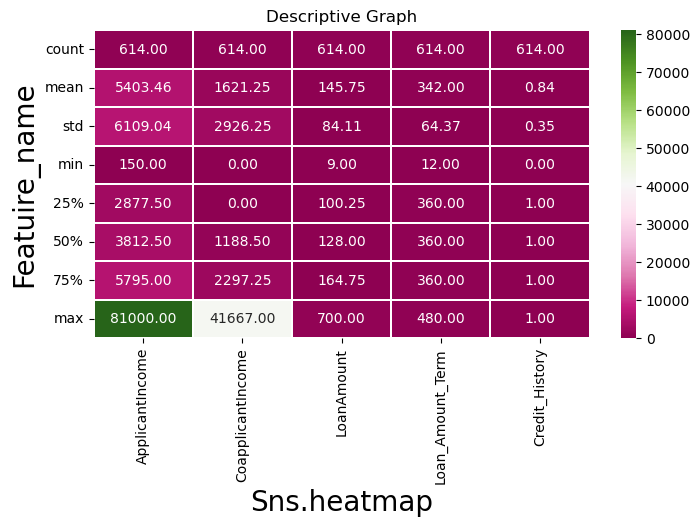

In [352]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, color='white', cmap='PiYG')
plt.xlabel("Sns.heatmap", fontsize=20)
plt.ylabel("Featuire_name", fontsize=20)
plt.title("Descriptive Graph")
plt.show()

OBSERVATIONS:
1. All the row counts are equal. Therefore, no missing values. No negativ values in the dataset. So summary is good.
2. Standard deviation for all the columns is very high indicating vast dataspread except in Credit_History column which is less than 1.
3. Mean is greater than median for columns ApplicantIncome, CoapplicantIncome, and LoanAmount. So here, one can note right-sided skewness. Also mean is lesser than median in columns Loan_Amount_term and Credit_History, and so here we can find left-sided skewness. 
4. Outliiers can be detected as the values of Max and 75% have a large difference between them. Only for credit_history, there are no outliers as both the values shows as 1. 
5. Minimum value for applicantincome is 150 and loan amount is 9. The min value for coapplicant and credit_history is 0. Loan_amount_term is 12. Similary one can check 25% values also.
Maximum value is 81000 for Applicantincome

# Splitting the columns into categorical and numerical columns

In [378]:
categorical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)

categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [379]:
numerical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Graphical Explanatory Data Analysis


# Univariate Analysis using Countplots

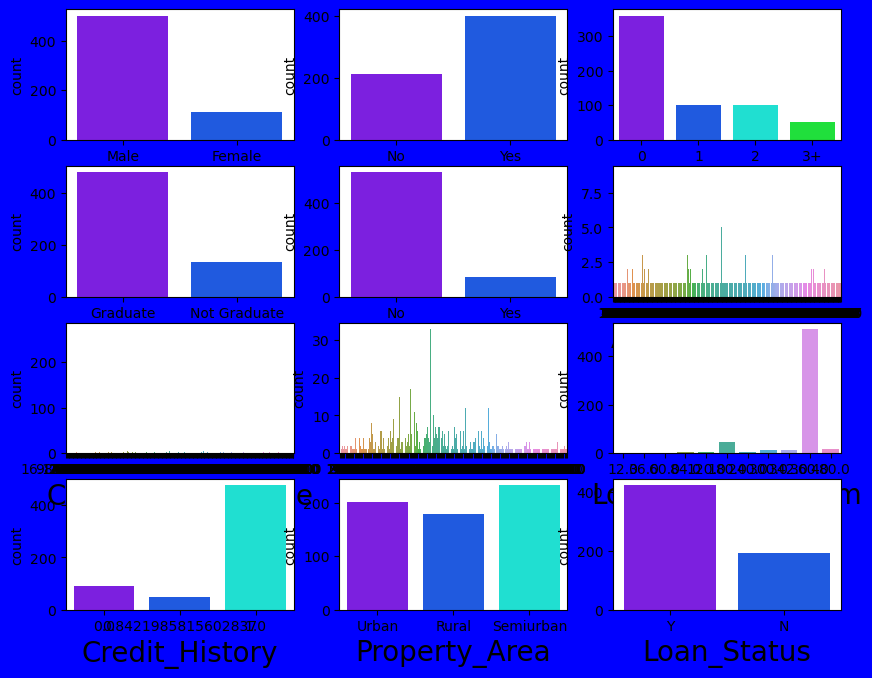

In [358]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,20),facecolor='blue')
plotnum=1
for col in df:
    if plotnum<=19:
        plt.subplot(10,3,plotnum)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

The graph shows that male counterparts were more who took the loan as compared to their female counterparts.
Those who took th loan were majority of them married and graduates were more in number and those who were self-employed 
were less. Most of the people who took loan were salaried persons.
Semiurban area was the most chosen property.
The Creadit_History shows 3 distinct values, 1 is the maximum value.
Laon_status indicates most of them are approved and few of them did not. 

Those who took th loan were majority of them married and graduates were more in number and those who were self-employed were 
less. Most of the people who took loan were salaried persons.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

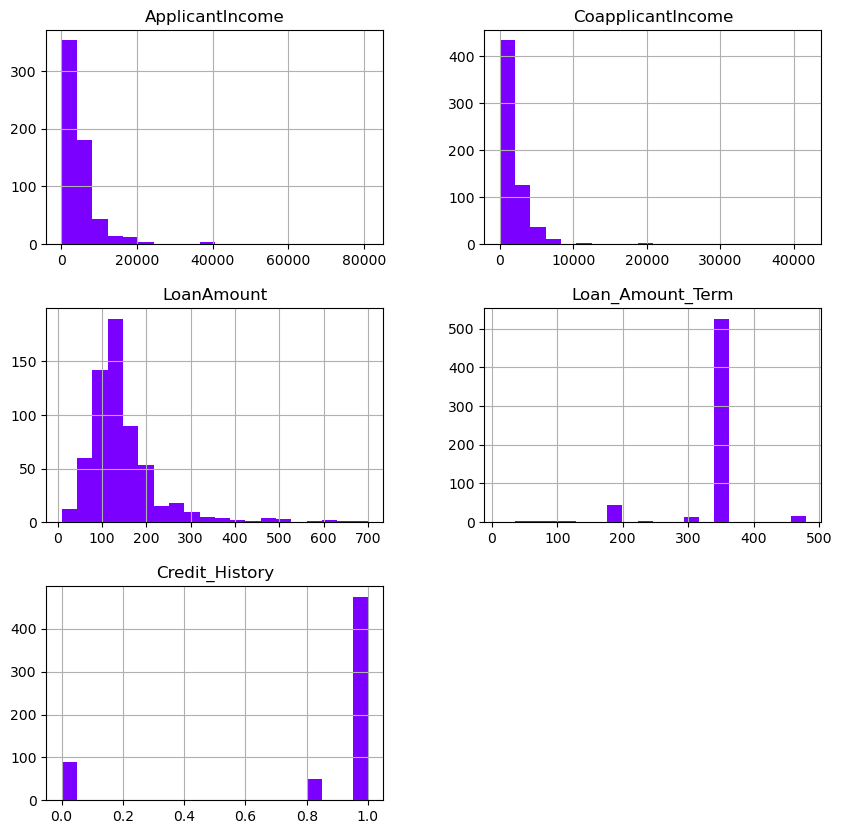

In [260]:
df.hist(bins=20, figsize=(10, 10))

In [ ]:
Histogram reveals the plots of ApplicantIncome, CoapplicantIncome, LoanAmount have right sided skewness.           0
Loan_Amount_Term and Credit_History has a left sided skewness.

In [380]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [381]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

# CHECKING FOR OUTLIERS USING ZSCORE METHOD

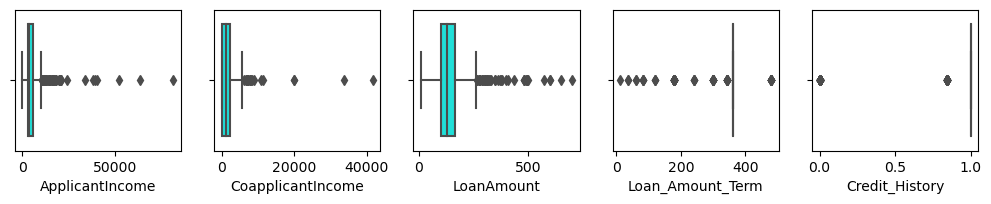

In [382]:
plt.figure(figsize=(15, 15))
plotnumber=1
for i in numerical_col:
    if plotnumber<=27:
        ax=plt.subplot(7, 6, plotnumber)
        sns.boxplot(df[i], palette='hsv')
    plotnumber+=1
plt.show()

In [383]:
attributes=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

In [384]:
from scipy.stats import zscore
z=np.abs(zscore(attributes))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,0.072991,0.554487,0.211241,0.279851
LP001003,0.134412,0.038732,0.211241,0.279851
LP001005,0.393747,0.554487,0.948996,0.279851
LP001006,0.462062,0.251980,0.306435,0.279851
LP001008,0.097728,0.554487,0.056551,0.279851
...,...,...,...,...
LP002978,0.410130,0.554487,0.889500,0.279851
LP002979,0.212557,0.554487,1.258378,2.518655
LP002983,0.437174,0.472404,1.276168,0.279851


In [385]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [363]:
z.iloc[9, 1] #zscore >3.

3.196712546212882

In [364]:
z.iloc[604, 2] #z>3

4.167692951743534

In [386]:
df1=df[(z<3).all(axis=1)]

In [366]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df1.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Dataframe 614
New Dataframe 577
DataLoss percentage: 6.026058631921824


In [ ]:
There is 6% dataloss, so we can go ahead with this as it is less than the threshold value of 10.

In [387]:
df=df1

In [62]:
q1=attributes.quantile(0.25)
q3=attributes.quantile(0.75)
IQR=q3-q1

In [63]:
df2=df[-((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

In [64]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df2.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Old Dataframe 577
New Dataframe 350
DataLoss percentage: 39.34142114384749


There is huge dataloss with IQR method, so we will go ahead with zscore method only.

# SCATTER PLOTS 

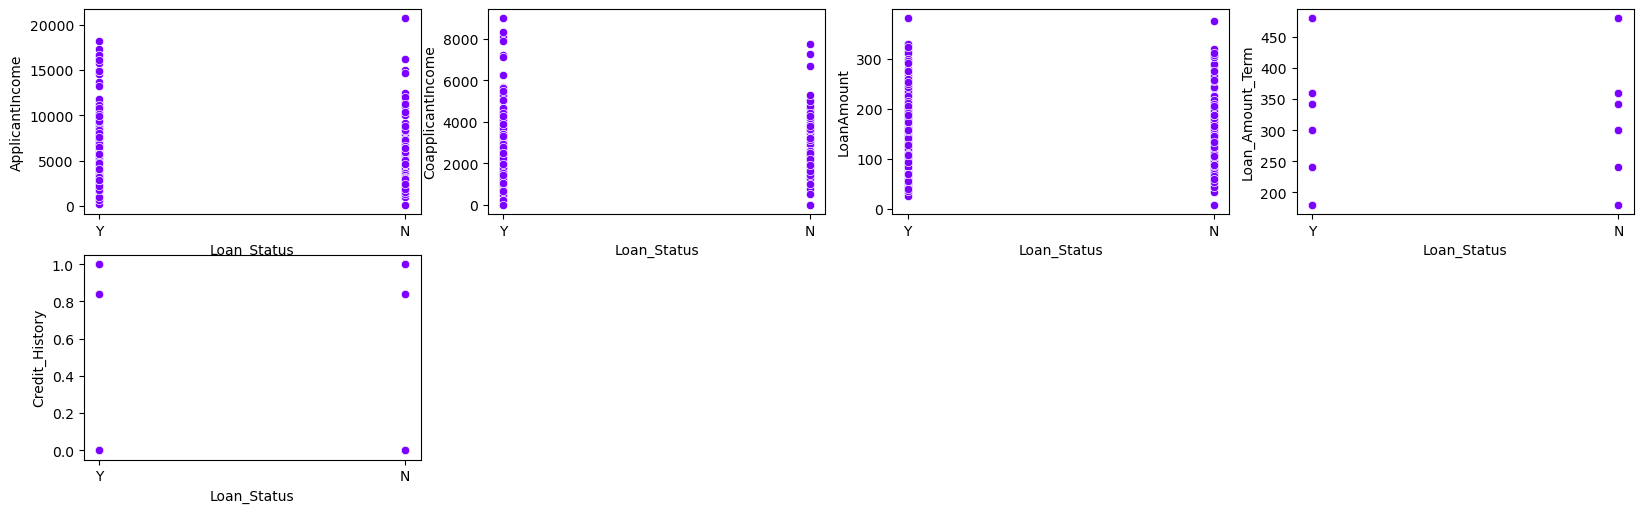

In [267]:
plt.figure(figsize=(20, 25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(8, 4 , p)
        sns.scatterplot(x='Loan_Status', y=i, data=df, palette ='bright')
        plt.xlabel('Loan_Status')
        plt.ylabel(i)
    p+=1
plt.show()



In [ ]:
The applicantIncome has majority points on value yes and is positively related with target variable. 
The same goes with coapplicantIncome variable also and there are maximum points on yes, and strongly positively related to target.
Loan amount has slightly less points to yes compared to no, which means loan amount slightly negative with loan status. 
Loan amount term has equal points on both approval and nonapproval. Again credit history also has equal points for both the 
possibilities.

# Checking for skewness using distribution plots

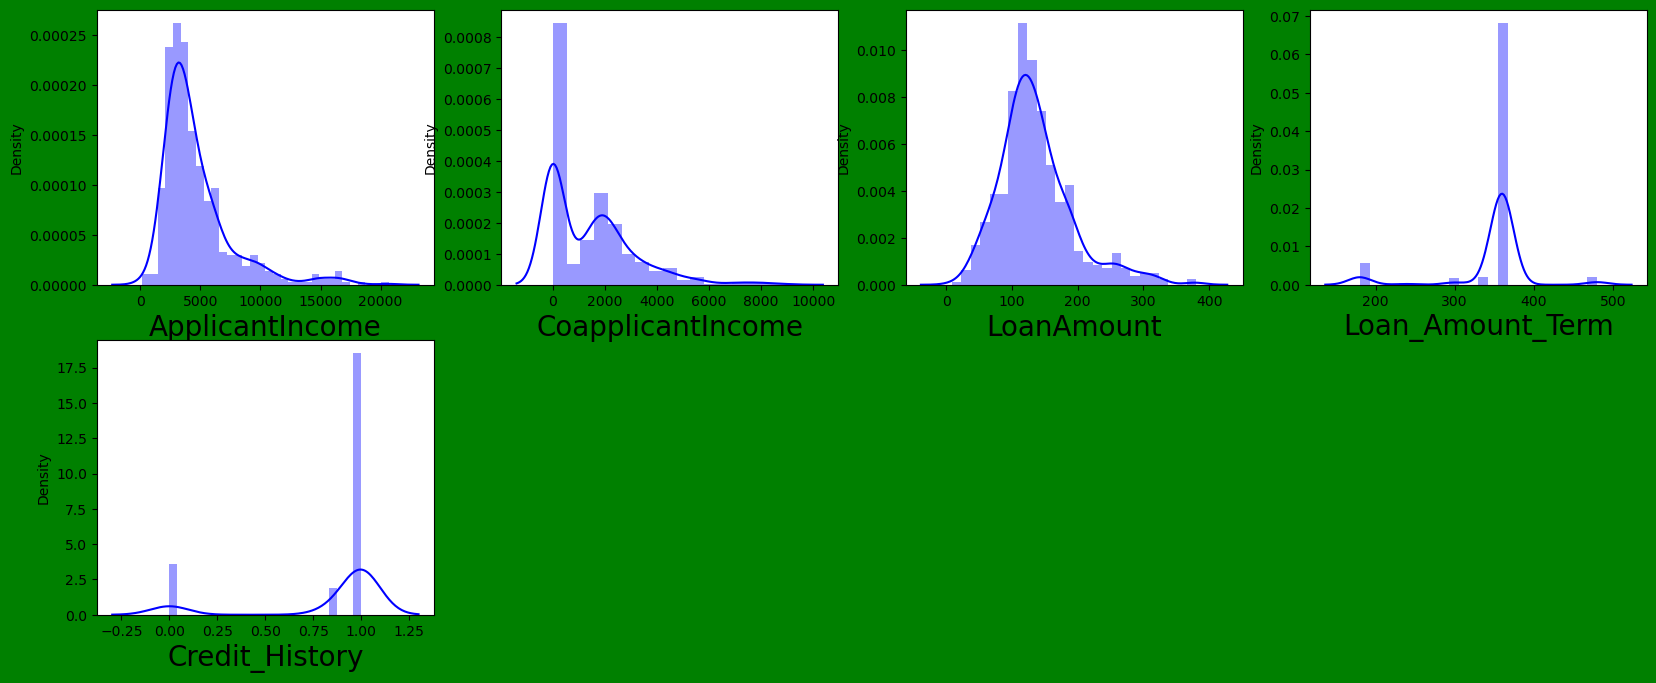

In [268]:
plt.figure (figsize=(20, 25), facecolor='green') #despite the fact that distplot will be depricated, am trying out this. 
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
All the numerical columns have a right ward skewness.  Loan amount term  and Credit history has a
left ward skewness.

In [388]:
df.skew()

Dependents           1.052106
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

In [389]:
skew=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

In [390]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [391]:
df.skew()

Dependents           1.052106
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

The skewness has reduced in all the columns except in Credit History and loan_amount_Term.

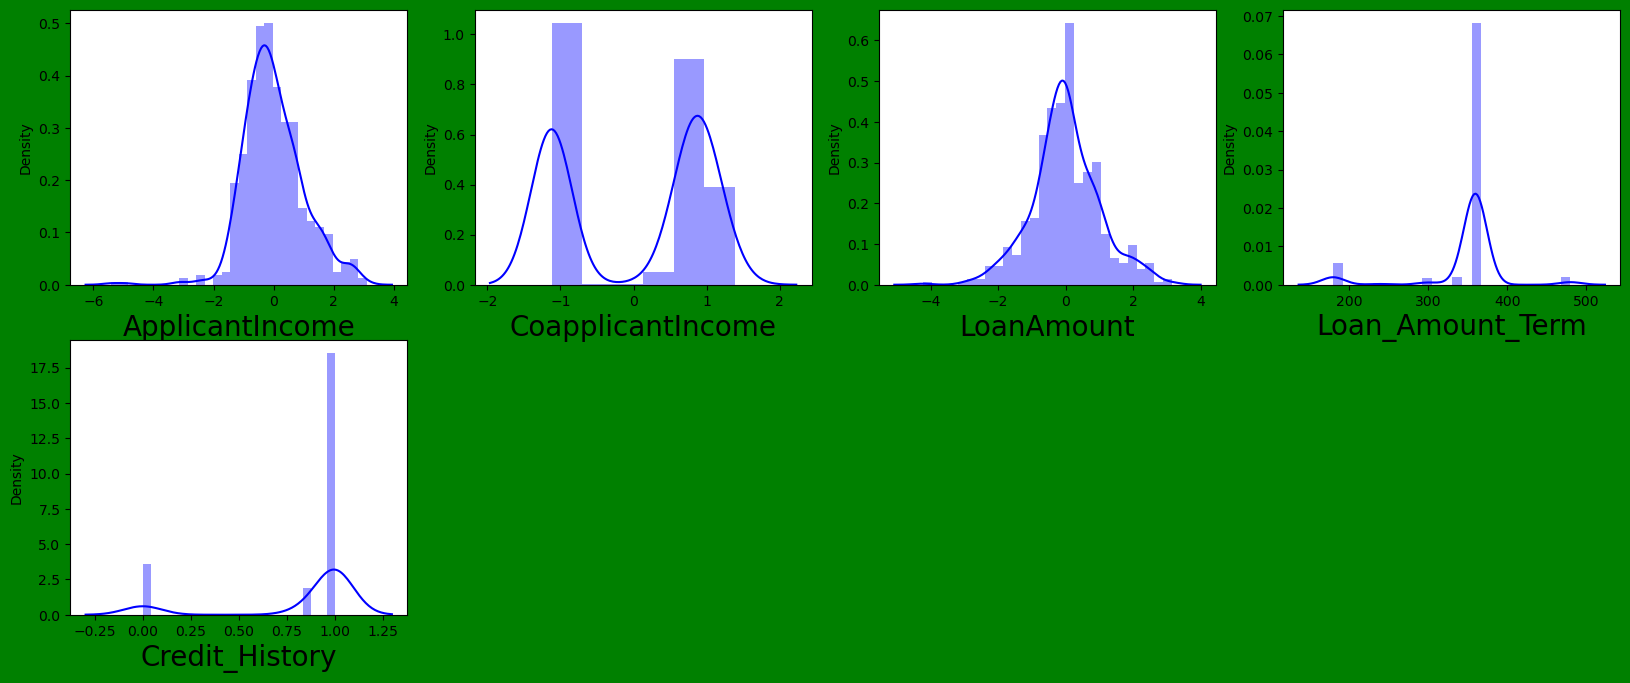

In [392]:
plt.figure (figsize=(20, 25), facecolor='green') #despite the fact that distplot will be depricated, am trying out this. 
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

# Bivariate Analysis

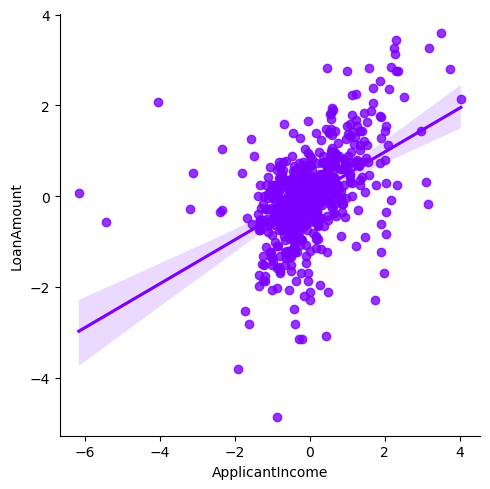

In [215]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=df)

In [ ]:
ApplicantIncome and loanamount are strongly positively correlated.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

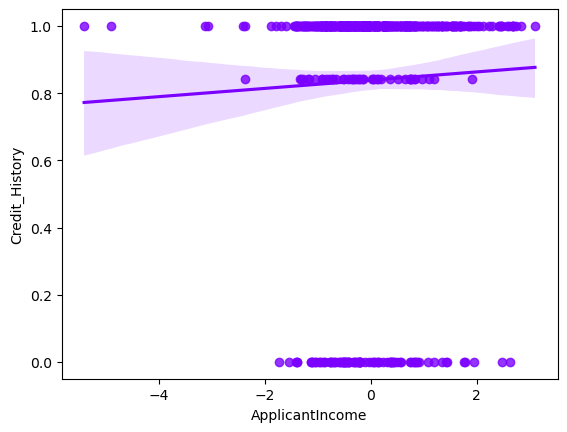

In [401]:
sns.regplot(x='ApplicantIncome', y='Credit_History', data=df)

We can see the line of best fit is in +ve linear relationship but both variables are not 
strongly +vely related.

<AxesSubplot:xlabel='Education', ylabel='count'>

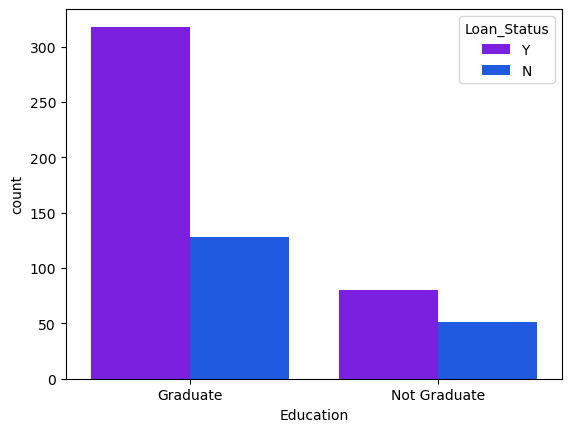

In [400]:
sns.countplot(x='Education',data=df, hue='Loan_Status')

In [ ]:
We can see that loan was given to graduates at about 80% rate. Non graduates were not preferred for
loan.


<AxesSubplot:xlabel='Dependents', ylabel='count'>

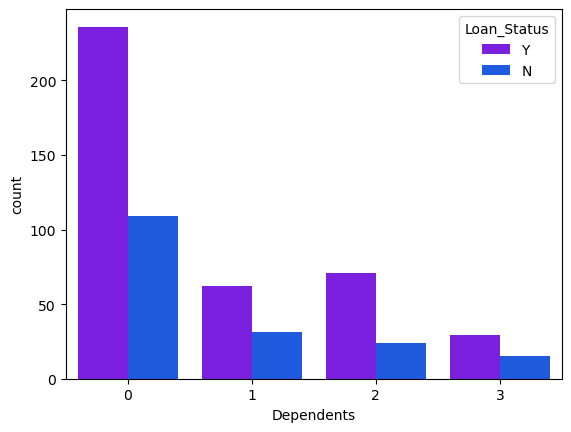

In [402]:
sns.countplot(x='Dependents',data=df, hue='Loan_Status')

Loan was given to 80% of those who did not have dependents and next maximum category was who had 2
dependents.

<AxesSubplot:xlabel='Gender', ylabel='count'>

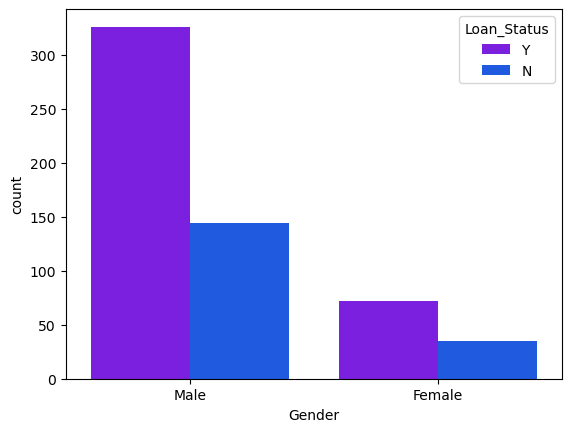

In [403]:
sns.countplot(x='Gender',data=df, hue='Loan_Status')

Again the graph shows that 80% of male received loan compared to female party.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

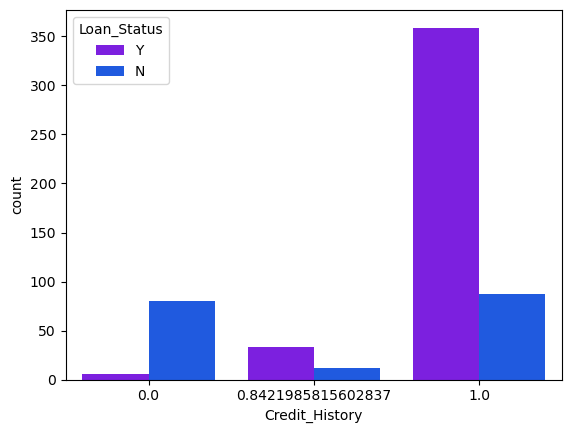

In [406]:
sns.countplot(x='Credit_History',data=df, hue='Loan_Status')

Loan again is approved for people with 1.0 credit history.

<AxesSubplot:xlabel='Married', ylabel='count'>

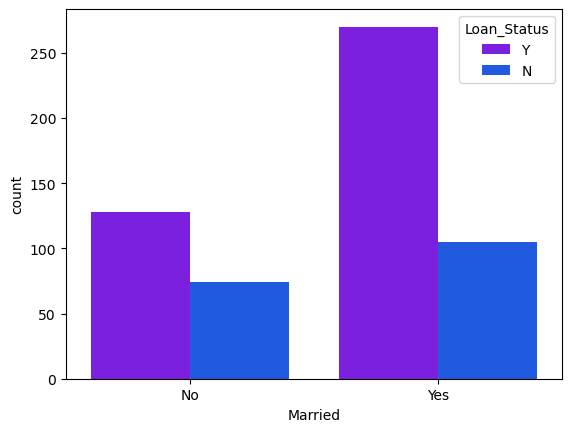

In [408]:
sns.countplot(x='Married',data=df, hue='Loan_Status')

Married persons were approved for loan most of the time.

# Multivariate Analysis

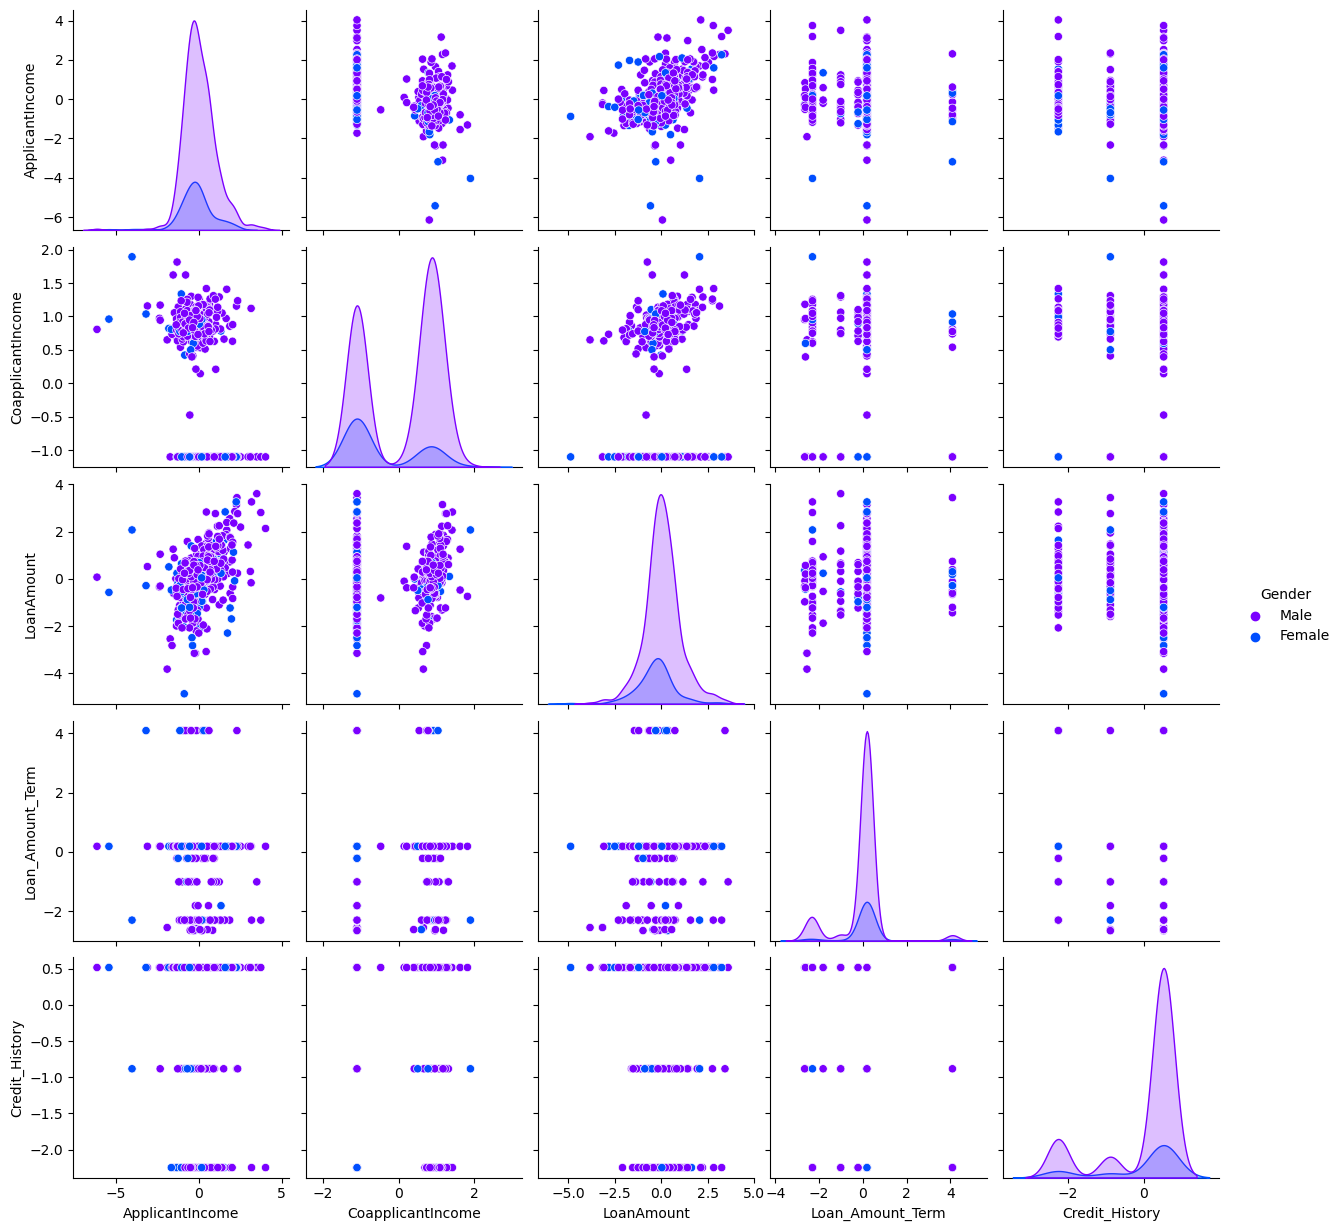

In [212]:
sns.pairplot(data=df, hue='Gender')

In [ ]:
1.We can see the distribution of the data in the diagnonal column. 
The credit column shows left skewness.
2. There is a positive linear relationship between columns:
    a. ApplicantIncome and LoanAmount.
    b. CoApplicantIncome and LoanAmount
   

# CALCULATING CORRELATION COEFFICIENT 

In [404]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.105994,0.004109,0.131772,-0.083756,-0.017044
ApplicantIncome,0.105994,1.000000,-0.360946,0.432154,-0.068592,0.034734
CoapplicantIncome,0.004109,-0.360946,1.000000,0.200081,-0.000588,0.001596
LoanAmount,0.131772,0.432154,0.200081,1.000000,0.051499,-0.006332
Loan_Amount_Term,-0.083756,-0.068592,-0.000588,0.051499,1.000000,0.030430
Credit_History,-0.017044,0.034734,0.001596,-0.006332,0.030430,1.000000


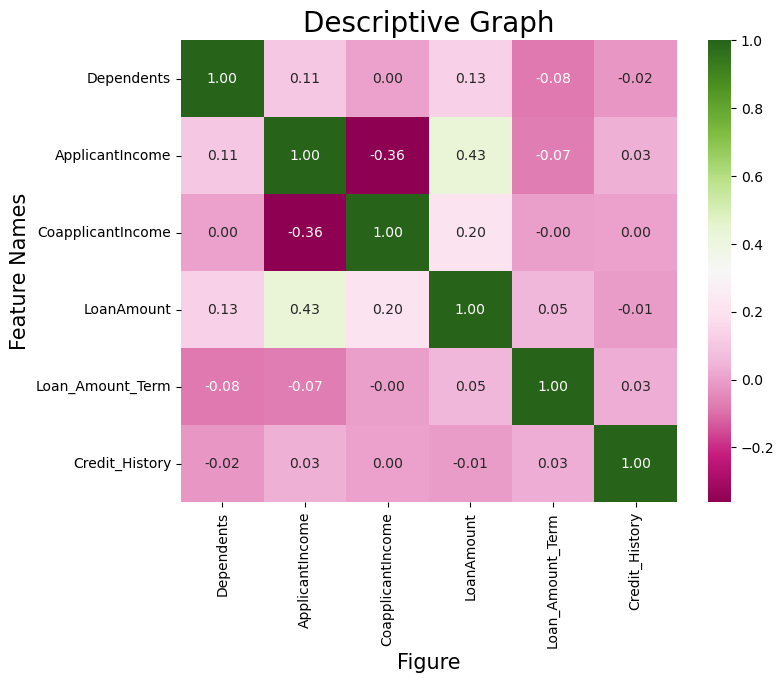

In [405]:
corr_hmap=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='PiYG')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

OBSERVATIONS
1.  ApplicantIncome is positively related to LaonAmount and credit History. Again it is negatively related with CoapplicationIncome
and Laon_Amount_Term.
2.  CoapplicationIncome is negatively related to ApplicationIncome and credit history. Laon_Amount_Term is neutral in this case
and is positively related with LoanAmount.
3.  LoanAmount is positively related to applicantIncome and coapplicantincome as well as loan_amount_term.
4.  Loan_amount_term is neutral wit respect to coapplicantincome. 
5.  Credit history is positively related to applicantincome, loan_amount_Term and other variables are -vely related.


# Dividing x data and target label for further calculations

In [409]:
x=df.iloc[:, :-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,0.681780,-1.122446,0.000771,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,0.234783,0.744117,0.000771,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.437336,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.153545,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,0.728848,-1.122446,0.238260,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,-0.587375,-1.122446,-1.293791,360.0,1.0,Rural
LP002979,Male,Yes,3,Graduate,No,0.035386,-1.122446,-2.332692,180.0,1.0,Rural
LP002983,Male,Yes,1,Graduate,No,1.281658,0.173344,1.845015,360.0,1.0,Urban


# Encoding the categorical columns to numeric

In [410]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
LP001003,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
LP001005,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
LP001006,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
LP001008,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


We have successfully encoded the categorical columns.

In [411]:
x=df.iloc[:, :-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2
LP001003,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0
LP001005,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2
LP001006,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2
LP001008,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,-0.587375,-1.122446,-1.293791,360.0,1.0,0
LP002979,1,1,3,0,0,0.035386,-1.122446,-2.332692,180.0,1.0,0
LP002983,1,1,1,0,0,1.281658,0.173344,1.845015,360.0,1.0,2


# Scaling the data for uniformity 

In [412]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.239408,0.456461,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.239408,0.456461,1.227472


# Variation_Inflation_Factor calculation for multicollinearity issues 

In [413]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.222883,0
1,1.416548,1
2,1.168439,2
3,1.072112,3
4,1.052483,4
5,1.763013,5
6,1.589495,6
7,1.558096,7
8,1.058208,8
9,1.011037,9


One can clearly note that there is no multicollinearity issue here as all values come under the 
threshold value of 10. So no need to drop any of the columns.

# SMOTE Techniques (As target has just 2 unique values and the dataset is biased)

In [289]:
pip install imbalanced-learn

In [414]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [415]:
y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 577, dtype: int32

In [416]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1, y1=smt.fit_resample(x, y)

In [417]:
x1.shape

(796, 11)

In [418]:
y1.shape

(796,)

In [419]:
x=x1
y=y1

The original rows were 614 and now there are 796 rows

In [420]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.000000,2
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.000000,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.000000,2
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.000000,2
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
791,1,0,0,0,0,0.895668,-1.122446,-0.437077,360.0,0.082678,0
792,1,1,3,0,0,-0.348966,0.900376,-0.007934,360.0,0.101021,0
793,1,0,0,0,0,-1.179076,1.029554,-1.413411,360.0,0.871043,0
794,0,0,2,1,0,0.277564,-1.122446,-0.694439,342.0,0.000000,1


# Scaling the data to uniform float values

In [421]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.499607,-1.258736,-0.698513,-0.523068,-0.329598,0.713257,-1.119102,0.012382,0.234741,0.625873,1.252559
1,0.499607,0.794448,0.333057,-0.523068,-0.329598,0.271009,0.755614,0.012382,0.234741,0.625873,-1.224552
2,0.499607,0.794448,-0.698513,-0.523068,3.033995,-0.482881,-1.119102,-1.469226,0.234741,0.625873,1.252559
3,0.499607,0.794448,-0.698513,1.911798,-0.329598,-0.744840,0.907947,-0.146602,0.234741,0.625873,1.252559
4,0.499607,-1.258736,-0.698513,-0.523068,-0.329598,0.759825,-1.119102,0.257055,0.234741,0.625873,1.252559
...,...,...,...,...,...,...,...,...,...,...,...
791,0.499607,-1.258736,-0.698513,-0.523068,-0.329598,0.924874,-1.119102,-0.438710,0.234741,-1.650600,-1.224552
792,0.499607,0.794448,2.396198,-0.523068,-0.329598,-0.306540,0.912556,0.003413,0.234741,-1.605079,-1.224552
793,0.499607,-1.258736,-0.698513,-0.523068,-0.329598,-1.127832,1.042299,-1.444578,0.234741,0.305846,-1.224552
794,-2.001572,-1.258736,1.364627,1.911798,-0.329598,0.313335,-1.119102,-0.703858,-0.115116,-1.855777,0.014004


# Selecting the best random state 

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [423]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    gb=GaussianNB()
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.799163179916318 on Random_state 68


In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8242677824267782 on Random_state 78


As LogisticRegression is giving good accuracy, I am going forward with 78 random state

# Training the data on random state 78 for various models

In [308]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=78)

In [425]:
x_train.shape

(557, 11)

In [426]:
x_test.shape

(239, 11)

In [427]:
y_train.shape

(557,)

In [428]:
y_test.shape

(239,)

Evaluating different algorithm ourput with the random state of 78

In [429]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_lr))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_lr))
print("Classification_Report is:", classification_report(y_test, pred_lr))

Accuracy_Score is: 0.7615062761506276
Confusion_Matrix is: [[ 76  49]
 [  8 106]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.90      0.61      0.73       125
           1       0.68      0.93      0.79       114

    accuracy                           0.76       239
   macro avg       0.79      0.77      0.76       239
weighted avg       0.80      0.76      0.76       239



In [432]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_gb))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_gb))
print("Classification_Report is:", classification_report(y_test, pred_gb))

Accuracy_Score is: 0.7531380753138075
Confusion_Matrix is: [[ 72  53]
 [  6 108]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.92      0.58      0.71       125
           1       0.67      0.95      0.79       114

    accuracy                           0.75       239
   macro avg       0.80      0.76      0.75       239
weighted avg       0.80      0.75      0.75       239



In [433]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_test, y_test)
pred_svc=svc.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_svc))
print("Confusion Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification Report is:", classification_report(y_test, pred_svc))

Accuracy Score is: 0.8493723849372385
Confusion Matrix is: [[ 94  31]
 [  5 109]]
Classification Report is:               precision    recall  f1-score   support

           0       0.95      0.75      0.84       125
           1       0.78      0.96      0.86       114

    accuracy                           0.85       239
   macro avg       0.86      0.85      0.85       239
weighted avg       0.87      0.85      0.85       239



In [462]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_rfc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_rfc))
print("Classification_Report is:", classification_report(y_test, pred_rfc))

Accuracy_Score is: 0.8242677824267782
Confusion_Matrix is: [[ 94  31]
 [ 11 103]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.90      0.75      0.82       125
           1       0.77      0.90      0.83       114

    accuracy                           0.82       239
   macro avg       0.83      0.83      0.82       239
weighted avg       0.83      0.82      0.82       239



In [435]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_etc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_etc))
print("Classification_Report is:", classification_report(y_test, pred_etc))

Accuracy_Score is: 0.8284518828451883
Confusion_Matrix is: [[ 97  28]
 [ 13 101]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.88      0.78      0.83       125
           1       0.78      0.89      0.83       114

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239



In [436]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_dtc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_dtc))
print("Classification_Report is:", classification_report(y_test, pred_dtc))

Accuracy_Score is: 0.7782426778242678
Confusion_Matrix is: [[100  25]
 [ 28  86]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.78      0.80      0.79       125
           1       0.77      0.75      0.76       114

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [440]:
from sklearn.neighbors import KNeighborsClassifier
knb=KNeighborsClassifier()
knb.fit(x_train, y_train)
pred_knb=knb.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, pred_knb))
print("Confustion Matrix is:",confusion_matrix(y_test, pred_knb))
print("Classification Report is:",classification_report(y_test, pred_knb))


Accuracy Score: 0.7698744769874477
Confustion Matrix is: [[86 39]
 [16 98]]
Classification Report is:               precision    recall  f1-score   support

           0       0.84      0.69      0.76       125
           1       0.72      0.86      0.78       114

    accuracy                           0.77       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.77      0.77       239



In [438]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_ada))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_ada))
print("Classification_Report is:", classification_report(y_test, pred_ada))

Accuracy_Score is: 0.8158995815899581
Confusion_Matrix is: [[ 95  30]
 [ 14 100]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.87      0.76      0.81       125
           1       0.77      0.88      0.82       114

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



In [458]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_gbr))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_gbr))
print("Classification_Report is:", classification_report(y_test, pred_gbr))


Accuracy_Score is: 0.8242677824267782
Confusion_Matrix is: [[ 95  30]
 [ 12 102]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.89      0.76      0.82       125
           1       0.77      0.89      0.83       114

    accuracy                           0.82       239
   macro avg       0.83      0.83      0.82       239
weighted avg       0.83      0.82      0.82       239



# Cross_val_technique

In [442]:
from sklearn.model_selection import cross_val_score

In [461]:
score=cross_val_score(lr, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_lr)-score.mean())


[0.7        0.74213836 0.76100629 0.7672956  0.81132075]
0.7563522012578617
The difference between Accuracy_score and Cross_Val_Score is: 0.00515407489276587


In [463]:
score=cross_val_score(rfc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_rfc)-score.mean())

[0.7625     0.75471698 0.79874214 0.8427673  0.88050314]
0.8078459119496856
The difference between Accuracy_score and Cross_Val_Score is: 0.016421870477092648


In [450]:
score=cross_val_score(dtc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_dtc)-score.mean())

[0.7125     0.68553459 0.74842767 0.74842767 0.79245283]
0.7374685534591195
The difference between Accuracy_score and Cross_Val_Score is: 0.04077412436514827


In [464]:
score=cross_val_score(etc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_etc)-score.mean())

[0.80625    0.74213836 0.78616352 0.82389937 0.86163522]
0.8040172955974842
The difference between Accuracy_score and Cross_Val_Score is: 0.024434587247704087


In [452]:
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_svc)-score.mean())

[0.70625    0.73584906 0.80503145 0.77358491 0.80503145]
0.7651493710691823
The difference between Accuracy_score and Cross_Val_Score is: 0.0842230138680562


In [453]:
score=cross_val_score(ada, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_ada)-score.mean())

[0.71875    0.72955975 0.77987421 0.80503145 0.86163522]
0.7789701257861634
The difference between Accuracy_score and Cross_Val_Score is: 0.0369294558037947


In [454]:
score=cross_val_score(gb, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_gb)-score.mean())

[0.68125    0.71698113 0.78616352 0.72327044 0.81761006]
0.745055031446541
The difference between Accuracy_score and Cross_Val_Score is: 0.008083043867266548


In [459]:
score=cross_val_score(gbr, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_gbr)-score.mean())

[0.7        0.73584906 0.81132075 0.85534591 0.88679245]
0.7978616352201258
The difference between Accuracy_score and Cross_Val_Score is: 0.026406147206652464


# RandomForestClassifier is giving the best results. Parameters for the same are below

In [471]:
#for RandomForestClassifer
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100], 'criterion':['gini'], 'max_depth':[None], 'min_samples_split':[2],
            'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 'max_features':['sqrt'],
            'max_leaf_nodes':[None], 'min_impurity_decrease':[0.0], 'bootstrap':[True], 
            'oob_score':[False], 'n_jobs':[None], 'random_state':[None], 'verbose':[0], 
            'warm_start':[False], 'class_weight':[None], 'ccp_alpha':[0.0], 'max_samples':[None]}



In [474]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [475]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [476]:
GCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [482]:
mymodel=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
mymodel.fit(x_train, y_train)
pred=mymodel.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)


84.10041841004184


# mymodel is giving 84% which is a good accuracy

# Saving and loading mymodel

In [485]:
import joblib
filename='Loan_Status'
joblib.dump(mymodel, 'Loan_Status.obj')

['Loan_Status.obj']

In [487]:
import joblib
mymodel=joblib.load('Loan_Status.obj')
result=mymodel.score(x_test, y_test)                               
print(result*100)


84.10041841004184


In [489]:
Conclusion=pd.DataFrame([mymodel.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion                                                                              

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
predicted,0,1,0,0,0,1,0,0,0,1,...,0,1,1,1,0,1,1,1,1,1
original,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,0,1,1,1,1,1


mymodel is almost similar to the original values.

# Plotting the AUC-ROC curve

In [492]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [493]:
pred_rfc_prob=rfc.predict_proba(x_test)[:,1] #GradientBoostingClassifier
pred_rfc_prob

array([0.02, 0.75, 0.53, 0.52, 0.24, 0.75, 0.  , 0.12, 0.14, 0.81, 0.79,
       0.47, 0.82, 0.07, 0.68, 0.85, 0.78, 0.03, 0.76, 0.01, 0.93, 0.63,
       0.88, 0.81, 0.03, 0.93, 0.85, 0.  , 0.05, 0.09, 0.39, 0.01, 0.57,
       0.67, 0.59, 0.7 , 0.88, 0.27, 0.1 , 0.03, 0.01, 0.75, 0.91, 0.02,
       0.78, 0.03, 0.8 , 0.32, 0.68, 0.02, 0.56, 0.05, 0.64, 0.74, 0.88,
       0.13, 0.76, 0.71, 0.72, 0.1 , 0.78, 0.74, 0.88, 0.73, 0.06, 0.53,
       0.75, 0.55, 0.67, 0.11, 0.75, 0.77, 0.7 , 0.66, 0.07, 0.01, 0.15,
       0.03, 0.51, 0.62, 0.67, 0.83, 0.81, 0.49, 0.6 , 0.48, 0.6 , 0.85,
       0.02, 0.18, 0.81, 0.69, 0.64, 0.69, 0.02, 0.01, 0.58, 0.1 , 0.26,
       0.91, 0.01, 0.14, 0.08, 0.35, 0.86, 0.74, 0.04, 0.04, 0.76, 0.03,
       0.43, 0.  , 0.57, 0.31, 0.31, 0.39, 0.76, 0.71, 0.1 , 0.8 , 0.04,
       0.46, 0.58, 0.79, 0.77, 0.4 , 0.02, 0.57, 0.74, 0.92, 0.28, 0.46,
       0.5 , 0.92, 0.72, 0.66, 0.07, 0.02, 0.17, 0.75, 0.28, 0.84, 0.83,
       0.61, 0.58, 0.13, 0.81, 0.03, 0.14, 0.36, 0.

In [495]:
fpr, tpr,thresholds=roc_curve(y_test, pred_rfc_prob)
fpr

array([0.   , 0.   , 0.   , 0.   , 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.016, 0.016, 0.024, 0.024, 0.024, 0.032, 0.032, 0.032,
       0.056, 0.056, 0.064, 0.08 , 0.08 , 0.08 , 0.088, 0.096, 0.104,
       0.104, 0.104, 0.128, 0.136, 0.136, 0.144, 0.152, 0.184, 0.2  ,
       0.2  , 0.232, 0.24 , 0.248, 0.256, 0.264, 0.272, 0.272, 0.28 ,
       0.296, 0.304, 0.312, 0.312, 0.312, 0.336, 0.368, 0.376, 0.392,
       0.408, 0.424, 0.448, 0.464, 0.488, 0.52 , 0.544, 0.56 , 0.568,
       0.608, 0.616, 0.64 , 0.68 , 0.688, 0.728, 0.752, 0.816, 0.896,
       0.96 , 1.   ])

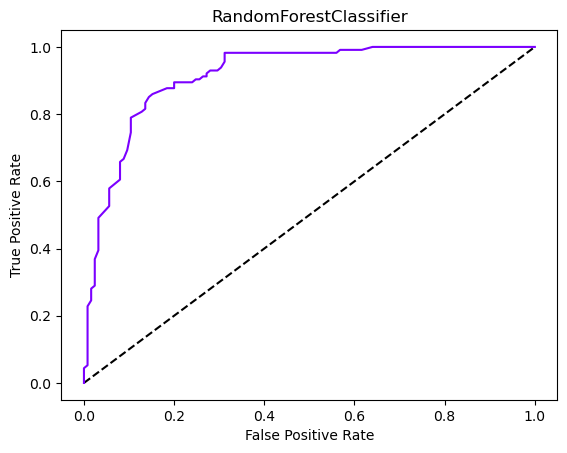

In [496]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()

In [ ]:
My model is giving 84%, so we can see the changes or area under the curve is just 84%. which is not bad also. ITs acceptable.

In [497]:
def predict(p):
    p=p.reshape(1, -1) 
    pred=rfc.predict(p)
    print("Loan_Status=", pred)
    if (pred==1):
        print("Yes, Loan Approved")
    elif (pred==0):
        print("No, Loan Not Approved")

In [500]:
p=np.array([1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2])
predict(p) 


Loan_Status= [1]
Yes, Loan Approved


In [ ]:
#####Closing Loan_Status Project######